In [72]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('Data/price/ETH-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/11/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,10/11/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,12/11/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,13/11/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [74]:
df.drop('Adj Close', axis=1, inplace=True)
df['Next Close'] = df['Close'].shift(-1)
df.set_index('Date', inplace=True)

In [75]:
df = df[:-1]
df.tail()

,Open,High,Low,Close,Volume,Next Close
Date,,,,,,
04/05/2023,1905.168945,1915.871704,1868.629761,1877.704102,6578438233,1995.060913
05/05/2023,1877.833130,1998.413574,1876.946655,1995.060913,9498261360,1900.221802
06/05/2023,1995.479126,2017.559448,1870.605591,1900.221802,9623243037,1873.076416
07/05/2023,1899.917603,1933.998413,1873.076416,1873.076416,6883942236,1849.042725
08/05/2023,1872.475098,1886.162109,1818.450562,1849.042725,9895102899,1845.526611


In [76]:
X = df.drop('Next Close', axis=1)
y = df['Next Close']

In [77]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [79]:
from sklearn.preprocessing import RobustScaler

In [80]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [81]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.linear_model import ElasticNet, LinearRegression

In [83]:
model = ElasticNet()
model.fit(X_train, y_train)

ElasticNet()

In [84]:
pred = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [86]:
mean_absolute_error(y_test, pred)

110.63315371993328

In [87]:
np.sqrt(mean_squared_error(y_test, pred))

148.79494402740056

In [88]:
model.score(X_test, y_test)

0.9788007653649384

Using Close only

In [63]:
X_close = np.array(df[['Close']])
y = np.array(df['Next Close'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_close, y, test_size=0.3, shuffle=False)

In [65]:
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [66]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
model_1 = ElasticNet()
model_1.fit(X_train, y_train)

ElasticNet()

In [68]:
pred_1 = model_1.predict(X_test)

In [69]:
mean_absolute_error(y_test, pred_1)

256.66306830334565

In [71]:
model_1.score(X_test, y_test)

0.90398069656176

In [102]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

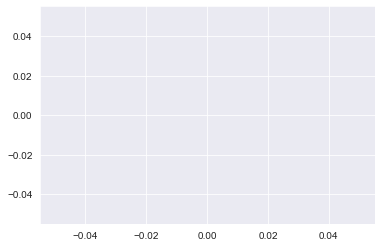

In [103]:
sns.lineplot(y=pred_1)

In [108]:
start = '13/09/2021'
end = '08/05/2023'

In [117]:
new = pd.DataFrame({'True': y_test, 'Prediction':pred})
new['Date'] = np.arange(len(new))

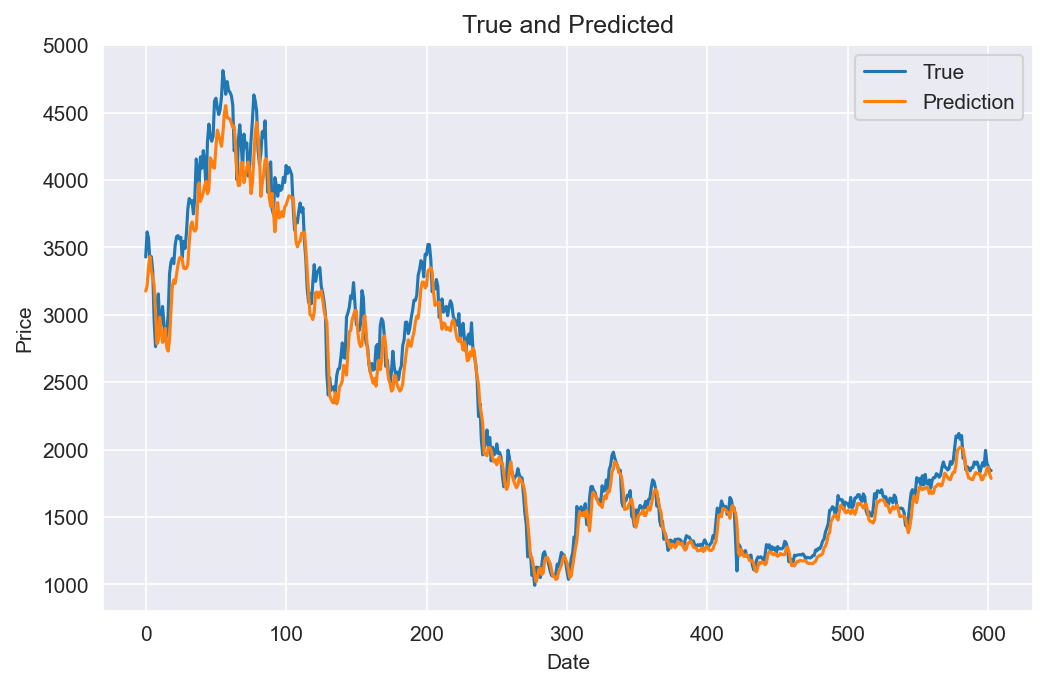

In [122]:
plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()

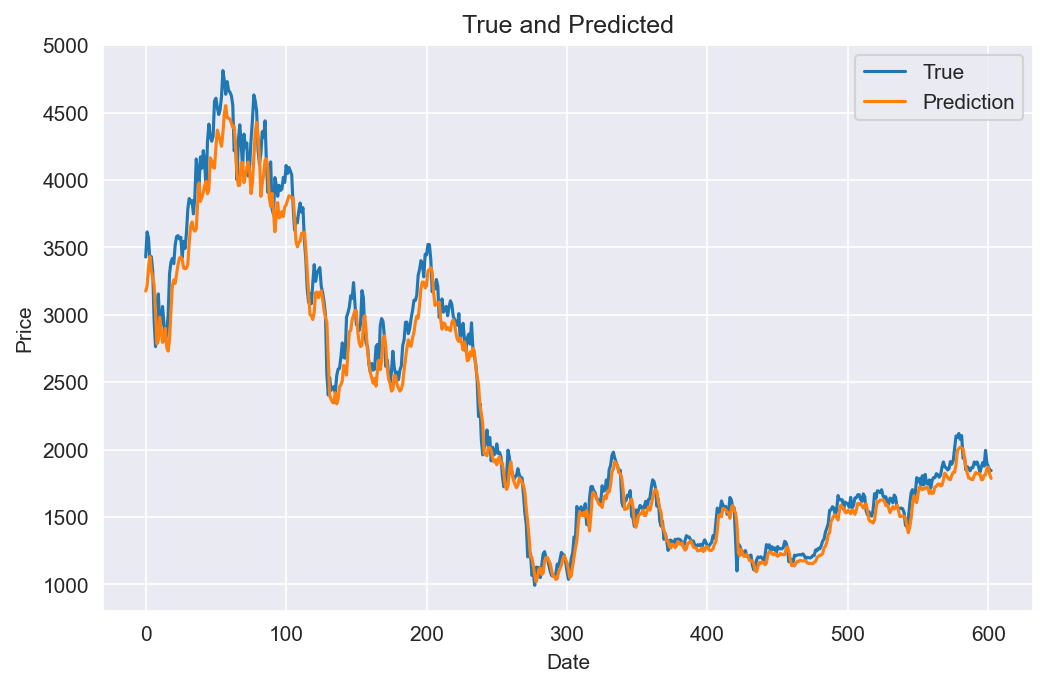

In [123]:
new_1 = pd.DataFrame({'True': y_test, 'Prediction':pred_1})
new_1['Date'] = np.arange(len(new_1))

plt.figure(figsize=(8,5), dpi=150)
plt.plot(new['Date'], new['True'], label='True')
plt.plot(new['Date'], new['Prediction'], label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('True and Predicted')
plt.legend()